# 1. Frame the problem

Firstly The titanic problem is a supervised problem and classifier problem (1 is survived 0 is not survived) and this is a batch learning as well because no continous flow of data

#  2. Get the data

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

train_data=pd.read_csv("C:\\Users\\hasee\\workspace\\Kaggle\\Titanic\\train.csv")
test_data=pd.read_csv("C:\\Users\\hasee\\workspace\\Kaggle\\Titanic\\test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


from the test_data , we can see that our goal is to predict the survival of each test passenager

from the overall view of the data we can see 'age' and 'cabin' and 'embarked' has the data missing , later we will find methods to fix that

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


now before preprocessing the dataset, we want to split our train-set into train-set and develop-set. so we apply the train_test_split from sklearn.model_selection directly

In [5]:
from sklearn.model_selection import train_test_split

train_set, dev_set = train_test_split(train_data, test_size=0.2, random_state=42)
dev_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


This seems fine but let us looks at the data set size there are 891 samples in total and there might be bias

it seems that Pclass will be a important fearture, so I have to ensure in the develop-set is representive of varies categories of Pclass in the whole dataset  (How about other features?)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_data, train_data["Pclass"]):
    strat_train_set = train_data.loc[train_index]
    strat_test_set = train_data.loc[test_index]


now we can have a test on our dataset

In [7]:
def Pclass_proportions(data):
    return data["Pclass"].value_counts() / len(data)

train_set, dev_set = train_test_split(train_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": Pclass_proportions(train_data),
    "Stratified": Pclass_proportions(strat_test_set),
    "Random": Pclass_proportions(dev_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [8]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1,0.242424,0.296089,0.240223,22.136872,-0.907821
2,0.206510,0.184358,0.206704,-10.726864,0.094122
3,0.551066,0.519553,0.553073,-5.718577,0.364096


compare with Rand. %error and Strat. %error, it seems I successfully lower the error

# 3. Exploring the data

In [9]:
train_set=strat_train_set.copy()

'name' can be dropped out because we already have the id and name seems to be no use here

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            574 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          161 non-null object
Embarked       710 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


then we apply the corr_matrix to find the reletionship between differet numerical features( categorical features see later)

In [11]:
corr_mat=train_set.corr()

from the dataset we could see that Pclass and fare has strong correlation with survived,age ;SibSp,  Parch didn't see much correlation with Survived, then we see we could divided ages into bands

In [12]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


we can see there are five groups in total, 0-16,16-32,32-48,48-64,64-80,later we transfer ages into 5 groups

In [13]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


later in the pipeline we will create the new feature isAlone

In [14]:
train_data['isAlone']=0
train_data.loc[train_data['FamilySize']==1,'isAlone']=1

train_data[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,isAlone,Survived
0,0,0.505650
1,1,0.303538


so as Fare ,we can divided into band 

In [15]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [16]:
train_data=train_data.drop({'AgeBand','FamilySize','isAlone','FareBand'},axis=1)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Now We have a look at categorical features and analysis the relation between them and survived

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x0000029842042908>>

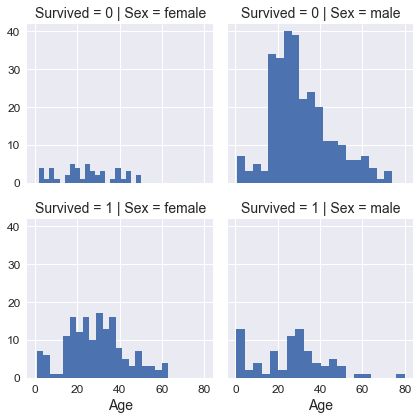

In [17]:
g = sns.FacetGrid(train_set, col='Sex',row='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend

We could roughly see that the female has larger probalilities to survive

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000002984427DC88>>

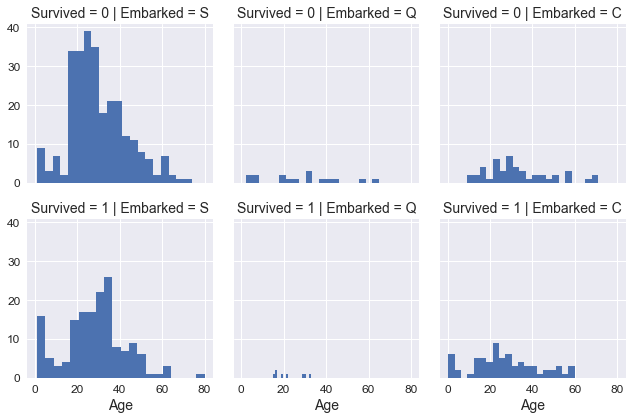

In [18]:
g = sns.FacetGrid(train_set, col='Embarked',row='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend

It seems embark has no correlation with survived,but when we combined the feature all

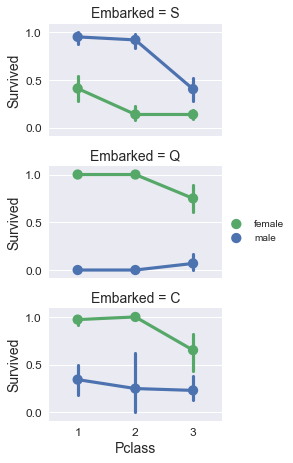

In [19]:
g = sns.FacetGrid(train_set,row='Embarked', size=2.2, aspect=1.6) # row=""means the titile
g.map(sns.pointplot,'Pclass','Survived', 'Sex',palette='deep') # the position is important, 'Pclass' is row, 'Survived' is column 
g.add_legend()

so we can see the male passengers embarked from S has higher probablities to survive comparing with other places,so we should add this into features

# 3. Preparing the data for machine learning

** In this part we have three things to do **
- 1. clean the data
- 2. handling with categorical features and set up new features
- 3. Build up the fit_transform pipeline

firstly we decided to drop the passenager ID(no use) , cabin(lost too much data) and Ticket(no correlation),but the name has titiles may transfered into a new feature

In [20]:
train_set=strat_train_set.copy()
train_set_labels=train_set["Survived"].copy()
train_set=train_set.drop(["Survived","PassengerId"],axis=1)
train_set

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
820,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
439,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
821,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
403,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
343,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
514,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S
40,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
101,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
93,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
81,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S


So does the develop set and test set

In [21]:
dev_set=strat_test_set.copy()
dev_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 132 to 203
Data columns (total 12 columns):
PassengerId    179 non-null int64
Survived       179 non-null int64
Pclass         179 non-null int64
Name           179 non-null object
Sex            179 non-null object
Age            140 non-null float64
SibSp          179 non-null int64
Parch          179 non-null int64
Ticket         179 non-null object
Fare           179 non-null float64
Cabin          43 non-null object
Embarked       179 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


In [22]:
dev_set_labels=dev_set["Survived"].copy()
dev_set=dev_set.drop(["Survived","PassengerId"],axis=1)
test_set=test_data.copy()
test_set=test_set.drop(["PassengerId"],axis=1)

In [23]:
train_set_cat=train_set[["Name","Embarked","Fare"]].copy()
train_set_num=train_set.drop(["Name","Embarked","Fare"],axis=1)
cat_attribs=list(train_set_cat)
num_attribs=list(train_set_num)
num_attribs

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin']

Let's try to find the function to set up new feature Titles

In [24]:
train_set_cat['Title']=pd.Series(train_set_cat['Name']).str.extract(' ([A-Za-z]+)\.', expand=False)

In [25]:
pd.crosstab(train_set_cat['Title'], train_set_num['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,1
Countess,1,0
Don,0,1
Dr,1,4
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,35


We pick out 4 most titiles and others divided into 'Rare'

In [26]:
train_set_cat['Title'] = train_set_cat['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_set_cat['Title'] = train_set_cat['Title'].replace('Mlle', 'Miss')
train_set_cat['Title'] = train_set_cat['Title'].replace('Ms', 'Miss')
train_set_cat['Title'] = train_set_cat['Title'].replace('Mme', 'Mrs')
train_set_cat

,Name,Embarked,Fare,Title
820,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",S,93.5000,Mrs
439,"Kvillner, Mr. Johan Henrik Johannesson",S,10.5000,Mr
821,"Lulic, Mr. Nikola",S,8.6625,Mr
403,"Hakkarainen, Mr. Pekka Pietari",S,15.8500,Mr
343,"Sedgwick, Mr. Charles Frederick Waddington",S,13.0000,Mr
514,"Coleff, Mr. Satio",S,7.4958,Mr
40,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",S,9.4750,Mrs
101,"Petroff, Mr. Pastcho (""Pentcho"")",S,7.8958,Mr
93,"Dean, Mr. Bertram Frank",S,20.5750,Mr
81,"Sheerlinck, Mr. Jan Baptist",S,9.5000,Mr


Then drop the Name

In [27]:
train_set_cat=train_set_cat.drop('Name',axis=1)

Then we have to fix the **missing data **of embarked and transfer these **categorical features into numerical

In [28]:
freq=pd.Series([train_set_cat[c].value_counts().index[0] for c in train_set_cat], index=train_set_cat.columns)
#freq=freq.loc[0]
freq

Embarked     S
Fare        13
Title       Mr
dtype: object

In [29]:
#freq=train_set_cat['Embarked'].mode()
train_set_cat['Embarked'].fillna(freq)
train_set_cat['Embarked'].value_counts()

S    503
C    145
Q     62
Name: Embarked, dtype: int64

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
train_set_cat_Sex = encoder.fit_transform(train_set_cat['Sex'])
train_set_cat_Title = encoder.fit_transform(train_set_cat['Title'])
train_set_cat_Embarked = encoder.fit_transform(train_set_cat['Embarked'])

#train_set=np.array([train_set_cat_Sex],[train_set_cat_Title])

np.concatenate((train_set_cat_Sex,train_set_cat_Title,train_set_cat_Embarked),axis=1)

we tried to make a pipe line which contains all the functions it does

first to build the selector to select the attributes

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [31]:
class CreateFeatures(BaseEstimator, TransformerMixin):
    def __init__(self,fare_guess=0.):
        self.fare_guess=fare_guess
    def fit(self,X,y=None):
        self.fare_guess=X['Fare'].dropna().median()
        return self
    def transform(self,X,y=None):
        X['Fare'].fillna(self.fare_guess,inplace=True)
        X.loc[ X['Fare'] <= 7.91, 'Fare']=0
        X.loc[(X['Fare'] > 7.91) & (X['Fare'] <= 14.454), 'Fare']=1
        X.loc[(X['Fare'] > 14.454) & (X['Fare'] <= 31), 'Fare']= 2
        X.loc[ X['Fare'] > 31, 'Fare'] =3
        X['Title']=pd.Series(X['Name']).str.extract(' ([A-Za-z]+)\.', expand=False)
        X=X.drop('Name',axis=1)
        X['Title'] = X['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        X['Title'] = X['Title'].replace('Mlle', 'Miss')
        X['Title'] = X['Title'].replace('Ms', 'Miss')
        X['Title'] = X['Title'].replace('Mme', 'Mrs')
        return X
        

In [32]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent)

so we can get the pipeline cat_pipeline

In [33]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, no need to try to
# understand every line.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [34]:
from sklearn.pipeline import Pipeline
cat_pipeline=Pipeline([('selector',DataFrameSelector(cat_attribs)),
                       ('create_feature',CreateFeatures()),
                       ('imputer',MostFrequentImputer()),
                        ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))]) #LabelBinarizer() not support multioutput
cat_pipeline.fit_transform(train_set)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

array([[ 0.,  0.,  1., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

now we design the pipeline for the numerical features

In [35]:
class Cat_to_Num_transfer(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        ticket=X['Ticket'].value_counts()
        ticket=pd.DataFrame(ticket)
        ticket_common=ticket[ticket['Ticket']>1]
        ticket_not=ticket[ticket['Ticket']==1]
        X=X.replace({'Ticket':ticket_common.index.values},1)
        X=X.replace({'Ticket':ticket_not.index.values},0)
        X['Sex'] = X['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
        return X

In [36]:
class Missdata_clean(BaseEstimator, TransformerMixin):
    def __init__(self,guess_df=0,age_guess=0.,guess_ages=np.zeros((2,3))):
        self.guess_df =guess_df
        self.age_guess=age_guess
        self.guess_ages=guess_ages
    def fit(self,X,y=None):
        for i in range(0, 2):
            for j in range(0, 3):
                self.guess_df = X[(X['Sex'] == i) & (X['Pclass'] == j+1)]['Age'].dropna()  #take off all NULL value
                self.age_guess = self.guess_df.median()
                # Convert random age float to nearest .5 age
                self.guess_ages[i,j] = int(self.age_guess/0.5 + 0.5 ) * 0.5
        return self
    def transform(self,X,y=None):
        for i in range(0, 2):
            for j in range(0, 3):
                X.loc[ (X['Age'].isnull()) & (X['Sex'] == i) & (X['Pclass'] == j+1),'Age'] = self.guess_ages[i,j]

        X['Age'] = X['Age'].astype(int)
        return X
    

In [37]:
class BandFeatures(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X.loc[X['Cabin'].isnull(),'Cabin']=0
        X.loc[X['Cabin'].notnull(),'Cabin']=1
        X.loc[ X['Age'] <= 18, 'Age'] = 0
        #X.loc[(X['Age'] > 16) & (X['Age'] <= 32), 'Age'] = 1
        #X.loc[(X['Age'] > 32) & (X['Age'] <= 48), 'Age'] = 2
        #X.loc[(X['Age'] > 48) & (X['Age'] <= 64), 'Age'] = 3
        X.loc[ X['Age'] > 18, 'Age']= 1
        X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
        X=X.replace({'FamilySize':[1,5,6,7]},1)
        X=X.replace({'FamilySize':[2,3,4]},2)
       # X['Fare'] = X['Fare'].astype(int)
        X=X.drop({'SibSp','Parch'},axis=1)
        print(X.columns)
        return X

        

In [38]:
from sklearn.preprocessing import Imputer
num_pipeline=Pipeline([('selector',DataFrameSelector(num_attribs)),
                       ('cat_to_num',Cat_to_Num_transfer()),
                        ('clean_data',Missdata_clean()),
                         ('band_features',BandFeatures()),
                        ('imputer',Imputer(strategy='median'))])
num_pipeline.fit_transform(train_set)

Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Cabin', 'FamilySize'], dtype='object')


array([[ 1.,  1.,  1.,  1.,  1.,  2.],
       [ 2.,  0.,  1.,  0.,  1.,  1.],
       [ 3.,  0.,  1.,  0.,  1.,  1.],
       ..., 
       [ 3.,  0.,  1.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  1.],
       [ 2.,  0.,  0.,  0.,  1.,  1.]])

then combined 2 pipelines

In [39]:
from sklearn.pipeline import FeatureUnion
full_pipeline=FeatureUnion(transformer_list=[("num_pipeline",num_pipeline),("cat_pipeline",cat_pipeline)])

X_train=full_pipeline.fit_transform(train_set)
X_train.shape

Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Cabin', 'FamilySize'], dtype='object')


D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

(712, 18)

In [40]:
y_train=train_set_labels

# find a ML mode and learn

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest_clf=RandomForestClassifier(max_features='sqrt')

In [43]:
#from scipy.stats import randint as sp_randint
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# 设置boosting迭代计算次数
param_grid = {
    'n_estimators': range(100, 400, 50),
    'max_depth': range(2, 7, 1),
    'criterion':['gini','entropy']
}
cross_validation = StratifiedKFold(n_splits=5)
grid_clf = GridSearchCV(estimator = forest_clf, param_grid = param_grid, scoring='accuracy', cv=cross_validation)
grid_clf.fit(X_train, y_train)
grid_clf.grid_scores_, grid_clf.best_params_, grid_clf.best_score_

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.79494, std: 0.02868, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100},
  mean: 0.79354, std: 0.02658, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 150},
  mean: 0.79213, std: 0.02653, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 200},
  mean: 0.79775, std: 0.02676, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 250},
  mean: 0.79494, std: 0.02718, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 300},
  mean: 0.79494, std: 0.02718, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 350},
  mean: 0.81601, std: 0.03212, params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100},
  mean: 0.80899, std: 0.03408, params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 150},
  mean: 0.81039, std: 0.02727, params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200},
  mean: 0.80758, std: 0.02754, params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 250},
  mean: 0.

let's try on the dev set 

In [44]:
X_dev=full_pipeline.transform(dev_set)
y_dev=dev_set_labels

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Cabin', 'FamilySize'], dtype='object')


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [45]:
y_pred=grid_clf.best_estimator_.predict(X_dev)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_dev, y_pred)

0.77653631284916202

not bad, now we train on the whole set

In [47]:
train_data=train_data.drop(['PassengerId'],axis=1)

In [48]:
y_full=train_data["Survived"]
X_full=train_data.drop("Survived",axis=1)
X_full=full_pipeline.fit_transform(X_full)

Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Cabin', 'FamilySize'], dtype='object')


D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [49]:
grid_clf.fit(X_full, y_full)
grid_clf.grid_scores_, grid_clf.best_params_, grid_clf.best_score_

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.79237, std: 0.02102, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100},
  mean: 0.79125, std: 0.01901, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 150},
  mean: 0.79125, std: 0.02018, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 200},
  mean: 0.79349, std: 0.02327, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 250},
  mean: 0.79237, std: 0.02279, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 300},
  mean: 0.78788, std: 0.02003, params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 350},
  mean: 0.80359, std: 0.02459, params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100},
  mean: 0.80247, std: 0.02362, params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 150},
  mean: 0.80359, std: 0.02526, params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200},
  mean: 0.80359, std: 0.02616, params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 250},
  mean: 0.

In [50]:
X_test=full_pipeline.transform(test_set)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Cabin', 'FamilySize'], dtype='object')


D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [51]:
y_pred=grid_clf.best_estimator_.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [52]:
submission=pd.DataFrame(test_data["PassengerId"])
submission.insert(1,'Survived',y_pred)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [53]:
submission.to_csv("C:\\Users\\hasee\\workspace\\Kaggle\\Titanic\\submission7.csv")